In [50]:
import numpy as np

mean = 0*np.squeeze(np.array([1,1,1]))
print(mean)

zi = np.squeeze(np.random.multivariate_normal([0,0],[[1,0],[0,1]],1))

W = np.random.normal(1,1, (3,2))

print(np.shape(np.matmul(W, zi.T)))
print(np.shape(mean))




[0 0 0]
(3,)
(3,)


In [51]:
# Factor Analysis model

# assumption in Factor 
# X = Wz + mean + epsilon

num_dimension = 3

import numpy as np
import matplotlib.pyplot as plt



W = np.random.normal(1,1, (3,2))


epsilon = .1

cova = epsilon*np.eye(num_dimension,num_dimension)

numPoints = 50

x = np.zeros((numPoints,num_dimension))

for i in range(numPoints):
    
    zi = np.squeeze(np.random.multivariate_normal([0,0],[[1,0],[0,1]],1))

    x[i,:] = np.random.multivariate_normal(mean + np.matmul(W, zi.T), cova)



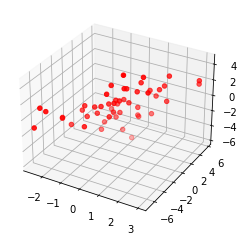

In [52]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x[:,0], x[:,1], x[:,2], c='r')
plt.show()

[[-0.90084344]
 [ 0.36939917]
 [ 0.22809068]]


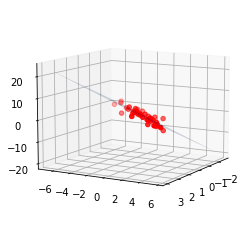

In [53]:
from scipy.linalg import null_space
from __future__ import division

beta = null_space(W.T)
print(beta)

# the definition of the plane is 

# beta1 x1 + beta2 x2 + beta3 x3 = 0


# x3 = -(beta1*x1 + beta2*x2)/beta3

xmin = np.min(x[:,0])
xmax = np.max(x[:,0])
ymin = np.min(x[:,1])
ymax = np.max(x[:,1])

xx, yy = np.meshgrid(np.linspace(xmin, xmax, 50),np.linspace(ymin, ymax, 50))

zz = (beta[0]*xx + beta[1]*yy)/beta[2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2], c='r')
ax.plot_surface(xx, yy, -zz, alpha = .2) 
ax.azim = 30
ax.elev = 10
plt.show()

In [54]:
import scipy
Wortho = scipy.linalg.orth(W)
print(Wortho)

[[-0.37964298  0.21059989]
 [-0.9251324  -0.08760309]
 [-0.00112125  0.97363925]]


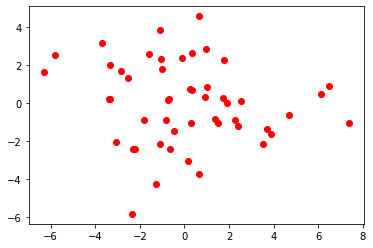

In [55]:
Wortho = scipy.linalg.orth(W)
projected_x = np.zeros((np.shape(x)[0], 2))

for i in range(np.shape(x)[0]):
    
    projected_x[i,0] = np.matmul(Wortho[:,0],x[i,:])
    projected_x[i,1] = np.matmul(Wortho[:,1],x[i,:])

    
plt.scatter(projected_x[:,0], projected_x[:,1], c='r')

In [56]:
reconstructed_x = np.zeros((np.shape(x)[0], 3))

for i in range(np.shape(x)[0]):
    
    reconstructed_x[i,:] = projected_x[i,0]*Wortho[:,0] + projected_x[i,1]*Wortho[:,1]
    

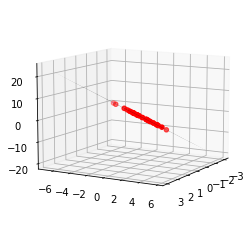

In [57]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(reconstructed_x[:,0], reconstructed_x[:,1], reconstructed_x[:,2], c='r')
ax.plot_surface(xx, yy, -zz, alpha = .2) 
ax.azim = 30
ax.elev = 10
plt.show()

In [58]:
# learning perspective 
# we assume that there is a subspace, and we want to learn it from 
# our training data

# PCA we look for the W that best captures the data while 
# enfording vectors defining the subspace (i.e. the columns of W) 
# to be orthonormal


# 1) build the empirical covariance matrix 

# (1/N) sum_i (x_i - mu) (x_i - mu)^T

# 2) compute the eigenvalue decomposition of emp covariance

# 3) retain the top K eigenvectors  ==> they give you the optimal


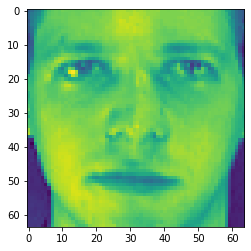

In [40]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()

images = faces.images

plt.imshow(images[0, :, :])
plt.show()

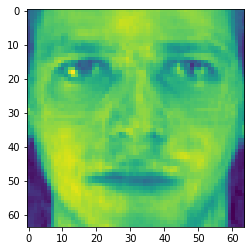

In [48]:
from sklearn.decomposition import PCA

imageData = faces.data

pca = PCA(n_components=200)
projection = pca.fit_transform(imageData)

approximated_imgs = pca.inverse_transform(projection)
plt.imshow(np.reshape(approximated_imgs[0, :], [64, 64]))
plt.show()

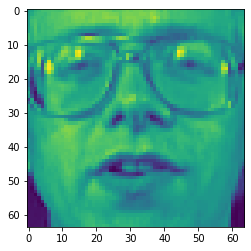

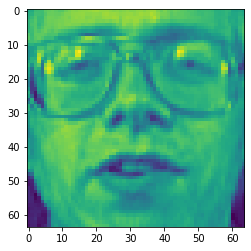

In [49]:
plt.imshow(images[10, :, :])
plt.show()

approximated_imgs = pca.inverse_transform(projection)
plt.imshow(np.reshape(approximated_imgs[10, :], [64, 64]))
plt.show()